# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Business Understanding

The dataset contains information from direct marketing campaigns by a Portuguese bank, focusing on promoting term deposits via phone calls. 
It includes demographic data, financial indicators, contact details, and previous campaign information. The target variable ('y') indicates whether clients subscribed ('yes') or not ('no'). The goal is to predict subscription likelihood. Analyzing this data can inform targeted marketing strategies, resource allocation, and campaign design, potentially improving subscription rates and campaign effectiveness.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

- As explaning in the business understanding, this data set represents marketing efforts by a banking firm. 

- Key features in the dataset include demographic details such as age, job type, marital status, and education level. Additionally, financial indicators like credit default status, housing ownership, and loan status are recorded. Contact-related attributes such as the method of contact, month, and day of the week of the call are also provided.

- Furthermore, the dataset includes information about the duration of the calls, the number of contacts made during the campaign, and details from previous contacts. Economic indicators such as employment variation rate, consumer price index, consumer confidence index, as well as other financial indicators, are included.

- The target variable 'y' signifies whether the client subscribed to the term deposit ('yes') or did not ('no'). The main objective is to predict the likelihood of subscription based on the provided features.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:

import time
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep =';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



As mentioned previously, the dataset comprises 20 features, with the target column labeled 'y', which indicates whether a customer accepted the offer or not.

Next, we will begin by cleaning the data, which involves tasks such as removing duplicates, assessing null values to either eliminate them or fill them with appropriate dummy values, and other necessary data preprocessing steps.

Furthermore, we will explore the correlation between each of these features and their impact on the target variable to understand how each feature influences the customer's decision to accept the offer.

#### Exploratory Data Analysis on Data

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

As observed above, there are no null values present in the dataset. This absence of null values saves us time and effort, as we do not need to address any missing data in our analysis.

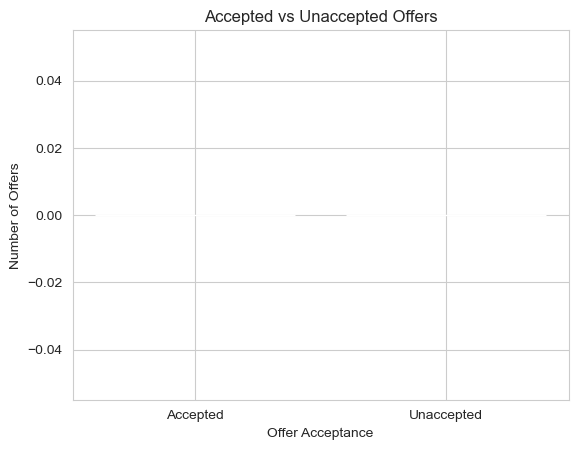

In [30]:
# Data of accepted vs unaccepted offers.
accepted_offers = df[df['y'] == 'yes'].shape[0]
unaccepted_offers = df[df['y'] == 'no'].shape[0]

plt.bar(
    ['Accepted', 'Unaccepted'], [accepted_offers, unaccepted_offers], color=['green', 'red'],
)

plt.xlabel('Offer Acceptance')
plt.ylabel('Number of Offers')
plt.title('Accepted vs Unaccepted Offers')
plt.show()


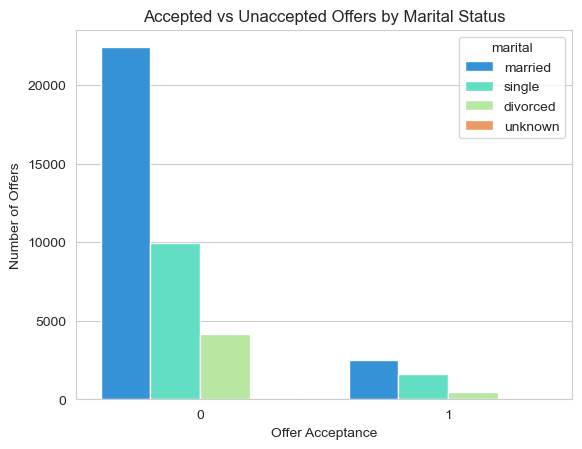

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='y', hue='marital', data=df, palette='rainbow')
plt.xlabel('Offer Acceptance')
plt.ylabel('Number of Offers')
plt.title('Accepted vs Unaccepted Offers by Marital Status')
plt.show()

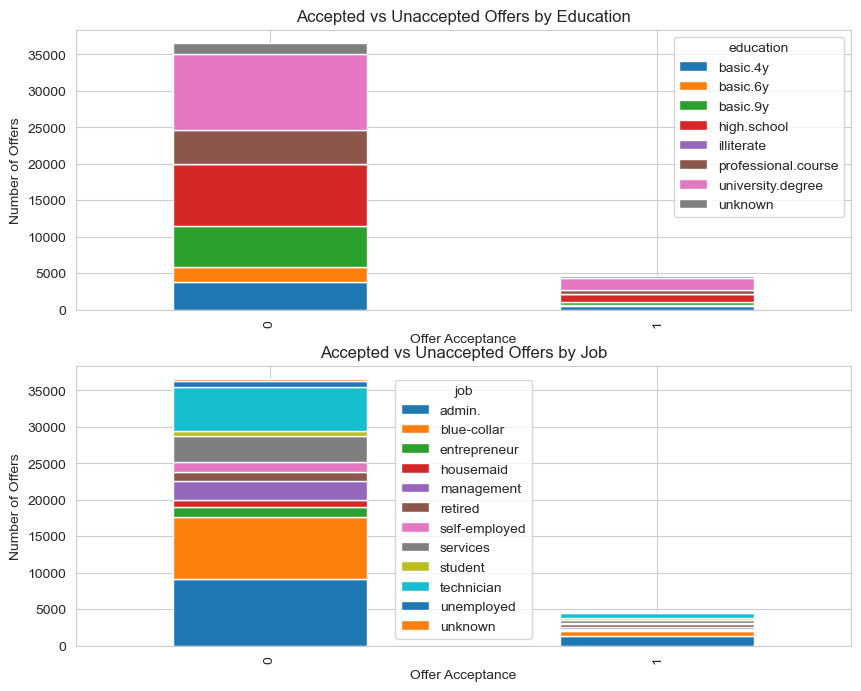

In [32]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

df.groupby(['y', 'education']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Accepted vs Unaccepted Offers by Education')
axes[0].set_xlabel('Offer Acceptance')
axes[0].set_ylabel('Number of Offers')

df.groupby(['y', 'job']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Accepted vs Unaccepted Offers by Job')
axes[1].set_xlabel('Offer Acceptance')
axes[1].set_ylabel('Number of Offers')

# plt.tight_layout()
plt.show()

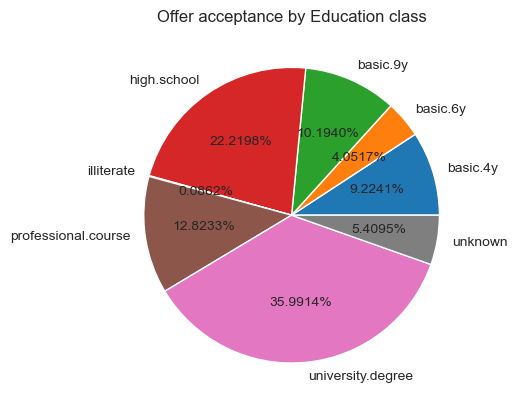

In [10]:
acceptedOffersByEdu = df[df['y']=='yes'].groupby('education').size()
plt.title('Offer acceptance by Education class')
plt.pie(acceptedOffersByEdu,labels=acceptedOffersByEdu.index,autopct='%1.4f%%')
plt.show()

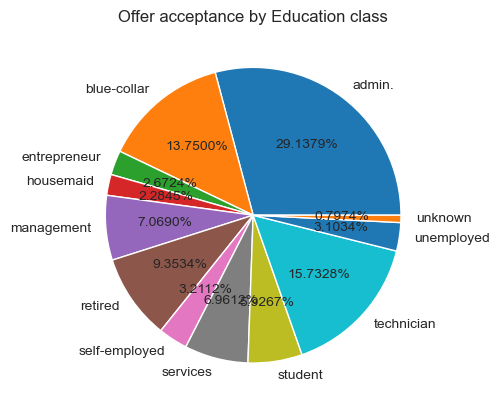

In [11]:
acceptedOffersByEdu = df[df['y']=='yes'].groupby('job').size()
plt.title('Offer acceptance by Education class')
plt.pie(acceptedOffersByEdu,labels=acceptedOffersByEdu.index,autopct='%1.4f%%')
plt.show()

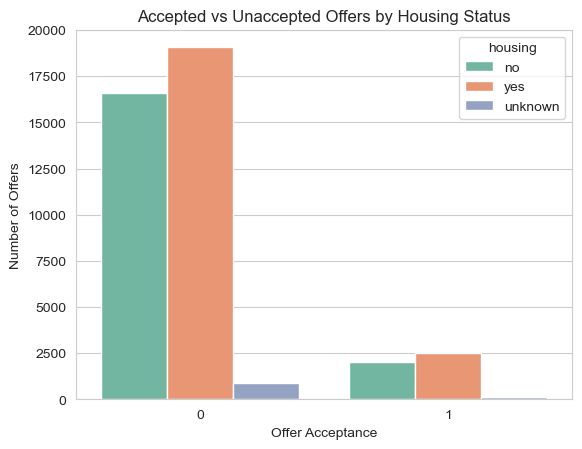

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='y', hue='housing', data=df, palette='Set2')
plt.xlabel('Offer Acceptance')
plt.ylabel('Number of Offers')
plt.title('Accepted vs Unaccepted Offers by Housing Status')
plt.show()

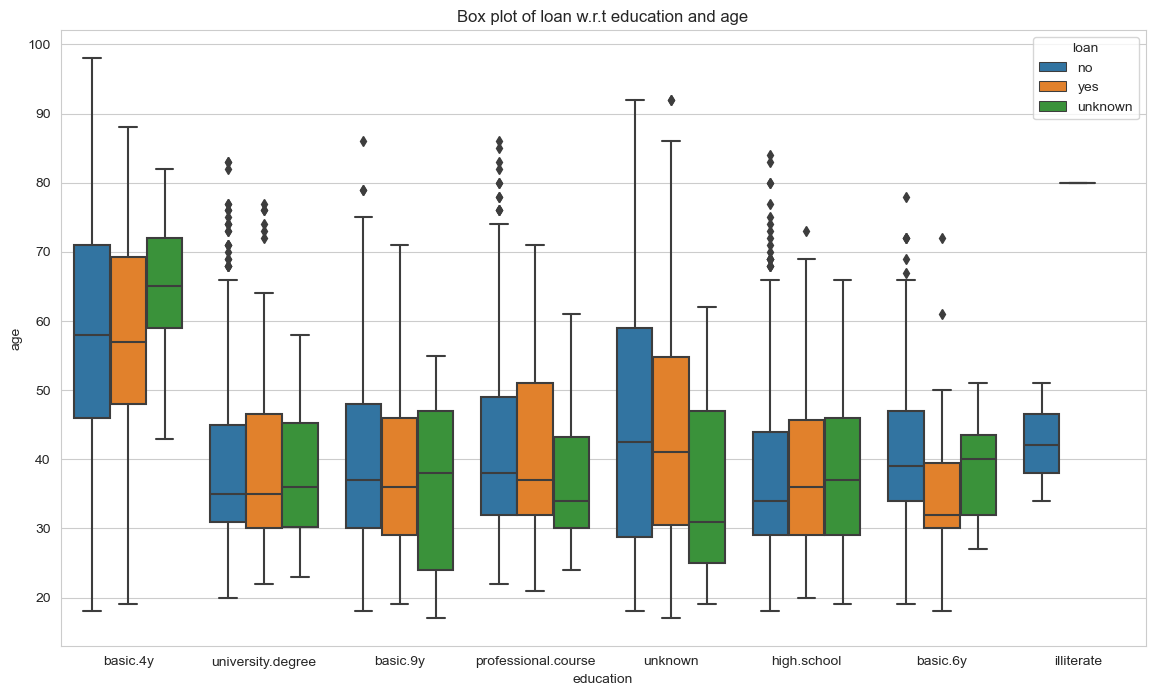

In [13]:
plt.figure(figsize=(14,8))
plt.title("Box plot of loan w.r.t education and age")
sns.boxplot(data=df.query("y == 'yes'"), x="education",y="age", hue="loan")
plt.show()

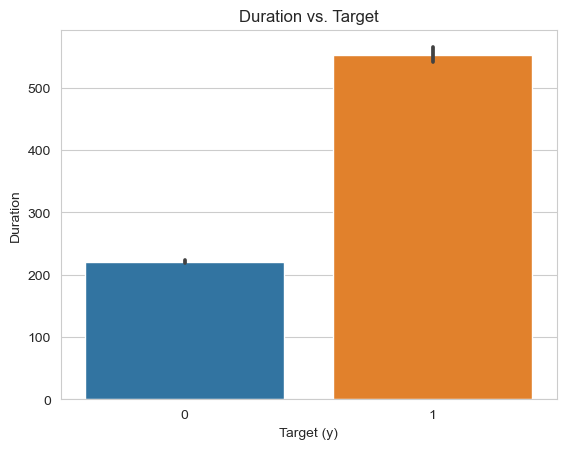

In [34]:

sns.barplot(x='y', y='duration', data=df)
plt.xlabel('Target (y)')
plt.ylabel('Duration')
plt.title('Duration vs. Target')
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

- The business objective is to optimize the direct marketing campaigns conducted by the bank for promoting term deposits.
- This data helps us in getting insights into client behavior, demographic trends, and the effectiveness of marketing strategies. Analyzing which features influence subscription rates the most can help in optimizing future marketing campaigns, enhancing customer engagement, and ultimately improving subscription rates.

### Problem 5: Engineering Features - Data processing

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
bank_info_features = df.iloc[:, 1:8]
encoder = OneHotEncoder(drop='first', sparse_output=False)
bank_info_encoded = pd.DataFrame(encoder.fit_transform(bank_info_features.select_dtypes(include=['object'])))
bank_info_encoded.columns = encoder.get_feature_names_out(bank_info_features.select_dtypes(include=['object']).columns)
bank_info_encoded = pd.concat([bank_info_encoded, bank_info_features.select_dtypes(exclude=['object'])], axis=1)
df['y'] = df['y'].map({'yes': 1, 'no': 0})
features = bank_info_encoded
target = df['y']
print("Shape of features:", features.shape)
print("Shape of target:", target.shape)

Shape of features: (41188, 28)
Shape of target: (41188,)


In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_blue-collar                41188 non-null  float64
 1   job_entrepreneur               41188 non-null  float64
 2   job_housemaid                  41188 non-null  float64
 3   job_management                 41188 non-null  float64
 4   job_retired                    41188 non-null  float64
 5   job_self-employed              41188 non-null  float64
 6   job_services                   41188 non-null  float64
 7   job_student                    41188 non-null  float64
 8   job_technician                 41188 non-null  float64
 9   job_unemployed                 41188 non-null  float64
 10  job_unknown                    41188 non-null  float64
 11  marital_married                41188 non-null  float64
 12  marital_single                 41188 non-null 

Using only the 7 columns asked for, the encoded data contains features that look like shown above. This encoded dataset is now ready for further analysis and modeling to predict subscription likelihood and inform targeted marketing strategies.

In [18]:
bank_info_encoded.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [19]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [35]:
X = bank_info_encoded
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [36]:
baseline = y_train.value_counts(normalize=True)[1]

print("Baseline for modeling: {:.2f}%".format(baseline * 100))

Baseline for modeling: 11.24%



The baseline of 11% indicates that approximately 11% of the clients in the training dataset subscribed to the term deposit. While this baseline may seem low, it is still useful as it provides a reference point for evaluating the performance of our predictive models.

In classification tasks where the classes are imbalanced, such as this one where the positive class ('yes' subscription) is much less frequent than the negative class ('no' subscription), achieving accuracy alone may not be sufficient. Instead, we should consider other evaluation metrics like precision, recall, F1 score, or area under the ROC curve (AUC-ROC) to assess the model's performance comprehensively.

Additionally, this baseline serves as a benchmark for comparing the performance of our models. Any model that performs only slightly better than the baseline may not provide significant improvements and may not be practical for deployment. Conversely, models that significantly outperform the baseline offer promising results and may be worth further exploration and refinement. Therefore, while the baseline of 11% may seem low, it is still valuable for guiding our modeling efforts and evaluating model performance.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

train_preds = log_reg_model.predict(X_train)
test_preds = log_reg_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\nClassification Report for Test Set:")
print(classification_report(y_test, test_preds, zero_division=1))

Training Accuracy: 0.887556904400607
Testing Accuracy: 0.8865015780529255

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       1.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.94      0.50      0.47      8238
weighted avg       0.90      0.89      0.83      8238



### Problem 9: Score the Model

What is the accuracy of your model?

Logistic regression model has been trained and evaluated on the given dataset and results are as shown above.

#### Overall Accuracy

The training accuracy of the model is approximately 88.76%, indicating that it performs well on the training data.
The testing accuracy is similar, at around 88.65%, suggesting that the model generalizes reasonably well to unseen data.

#### Precision, Recall, and F1-Score
For the '0' class (clients who did not subscribe to term deposits), the precision, recall, and F1-score are high, all around 0.89, indicating that the model effectively identifies clients who are not likely to subscribe to term deposits.
However, for the '1' class (clients who subscribed to term deposits), the precision is 1.00, but recall and F1-score are both 0.00. This suggests that while the model correctly identifies all instances where clients subscribed to term deposits, it fails to recall any of the actual positive instances. As a result, the F1-score, which is the harmonic mean of precision and recall, is also 0.00 for this class.

#### Interpretation
The high precision for the '1' class indicates that when the model predicts a client will subscribe to term deposits, it is highly confident in its prediction. However, the low recall indicates that the model misses many positive instances, resulting in poor overall performance for this class.
This imbalance in performance between the two classes suggests that the model may be biased towards predicting the majority class ('0') and may require further tuning or rebalancing techniques to improve its performance on the minority class ('1').

#### Conclusion
While the logistic regression model demonstrates strong performance in identifying clients who are unlikely to subscribe to term deposits, its performance on identifying subscribing clients is poor. Further analysis and model refinement are needed to address this imbalance and improve the overall effectiveness of the predictive model.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [23]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42), 
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    results.append((model_name, train_time, train_accuracy, test_accuracy))

results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.117604        0.887557       0.886502
1                  KNN    0.020976        0.872382       0.865987
2        Decision Tree    0.068601        0.891472       0.880918
3                  SVM   44.133631        0.887557       0.886502
4        Random Forest    2.082425        0.891472       0.882010


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

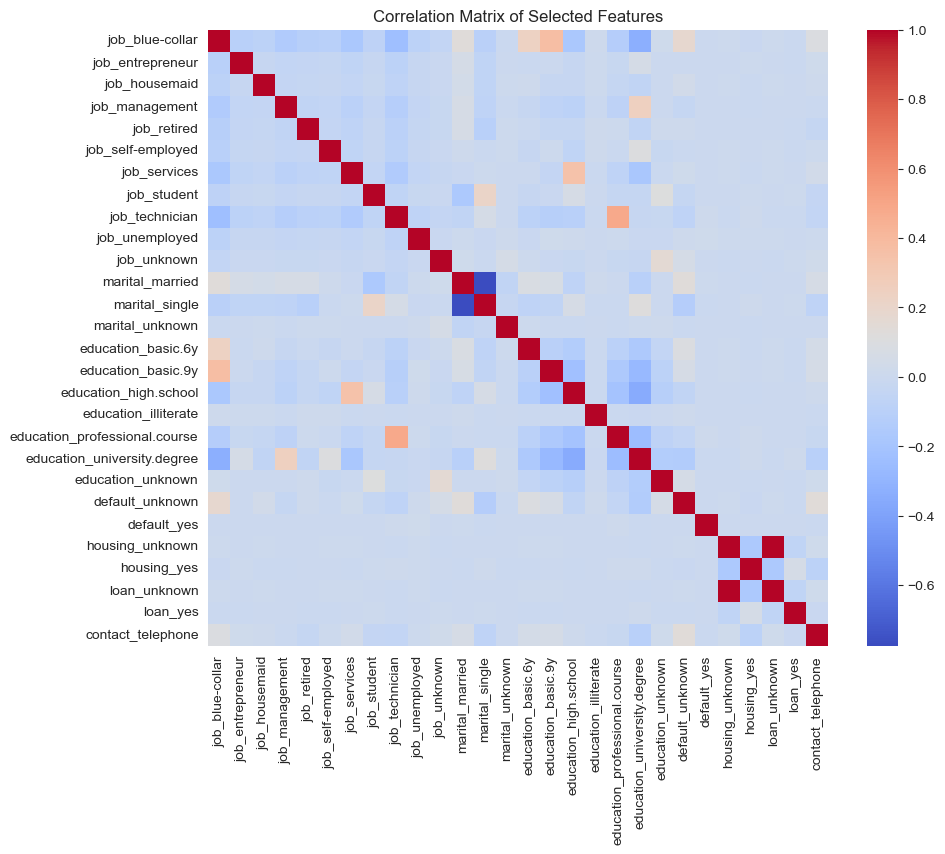

In [25]:
corr_matrix = bank_info_encoded.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


While one hot encoding helped in creating and training a simple model, it didn't help me determine the feature importance or to find the correlation. Hence, I decided to use ordinal encoding to understand the feature importance of those 7 columns.  

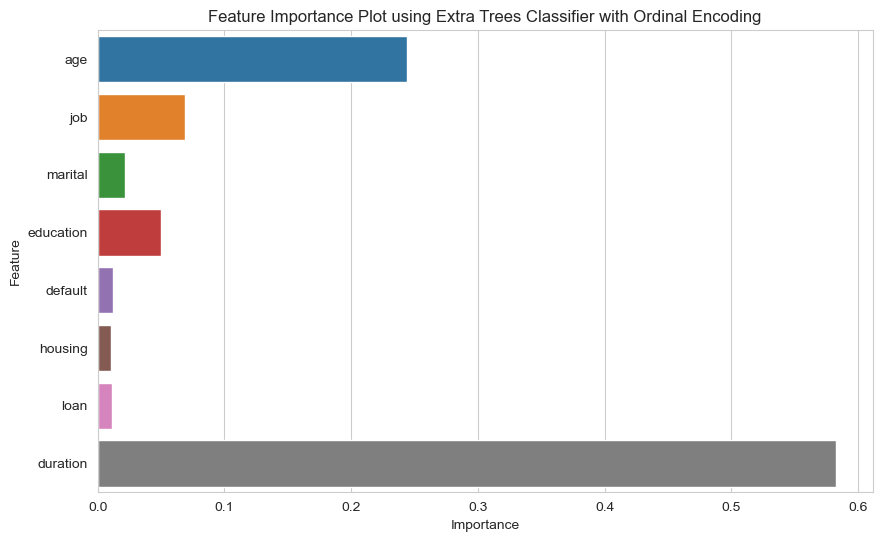

In [26]:
selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'duration', 'y']
df_selected = df[selected_features]

ordinal_encoder = OrdinalEncoder()
categorical_cols = df_selected.select_dtypes(include=['object']).columns
df_encoded = df_selected.copy()
df_encoded[categorical_cols] = ordinal_encoder.fit_transform(df_selected[categorical_cols])

X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X, y)

feature_importances = et_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

selected_feature_importance = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=selected_feature_importance)
plt.title('Feature Importance Plot using Extra Trees Classifier with Ordinal Encoding')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()

Having seen that the above columns are important in the displayed bars, we now start training the same models again with tuned hyperparameters and grid search CV. The results are then displayed in terms of ROC curve, confusion matrix

In [27]:
important_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'duration', 'contact', 'y']
data = df[important_features]

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features and target
X = data.drop(columns=['y'])
y = data['y']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Applying Standard Scaler, PCA before Logistic Regression

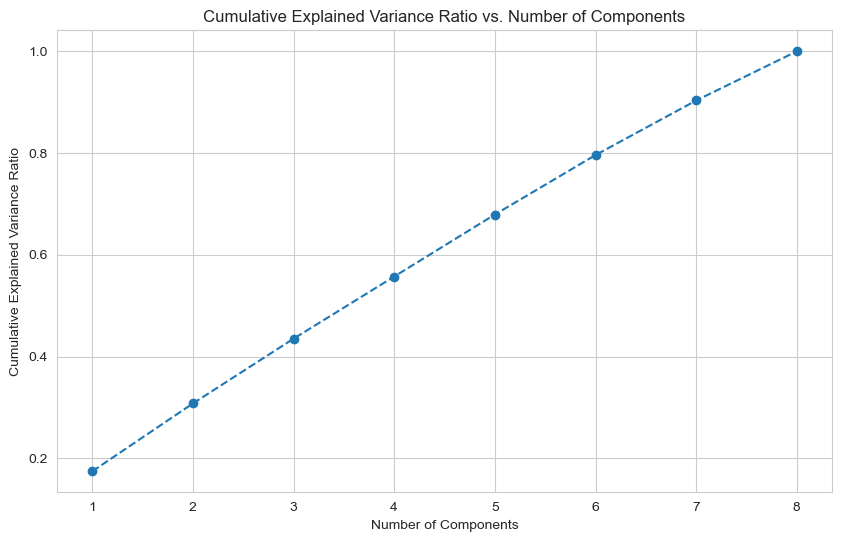

Number of PCA components explaining 95% of variance: 8


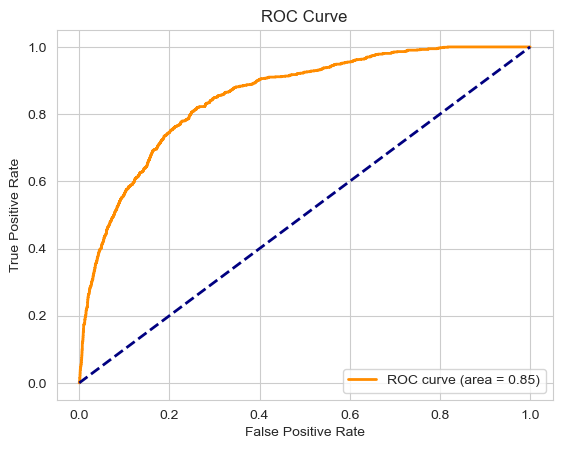

Evaluation Metrics for Logistic Regression with PCA:
Accuracy: 0.896698227725176
Precision: 0.6448275862068965
Recall: 0.2
F1 Score: 0.3053061224489796
Confusion Matrix:
[[7200  103]
 [ 748  187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7303
           1       0.64      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [28]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine number of components explaining 95% of variance
explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
n_components = (explained_variance_ratio_cumsum < 0.95).sum() + 1

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

print(f"Number of PCA components explaining 95% of variance: {n_components}")

# Fit logistic regression on PCA-transformed data
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca[:, :n_components], y_train)

# Make predictions
y_pred_pca = log_reg_pca.predict(X_test_pca[:, :n_components])
y_pred_proba_pca = log_reg_pca.predict_proba(X_test_pca[:, :n_components])[:, 1]

# Calculate evaluation metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_score_pca = f1_score(y_test, y_pred_pca)

# Confusion matrix
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

# Classification report
class_report_pca = classification_report(y_test, y_pred_pca)

# ROC curve
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, y_pred_proba_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curve
plt.figure()
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression with PCA:")
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)
print("F1 Score:", f1_score_pca)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_pca)

# Print classification report
print("Classification Report:")
print(class_report_pca)

Here it can be noted from the above variance graph that all 8 features are important and hence we are not going to apply PCA to all other classifiers. Instead, we are going to tune the parameters and compare the classifiers performance once again.

#### Comparing classifiers with tuned hyperparameters

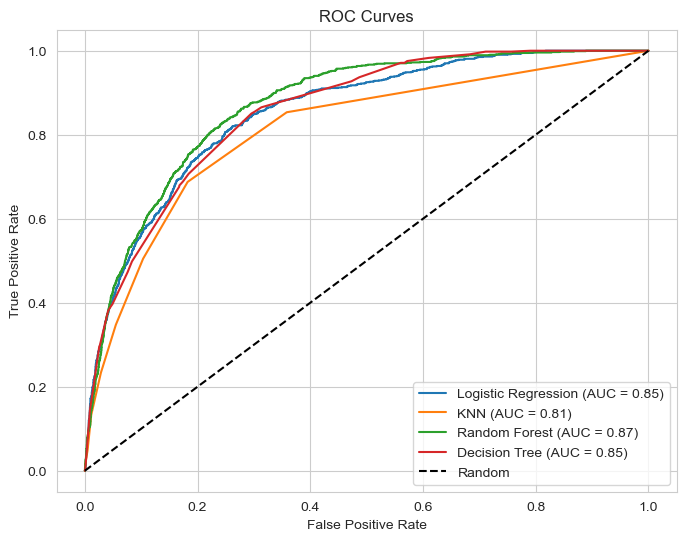

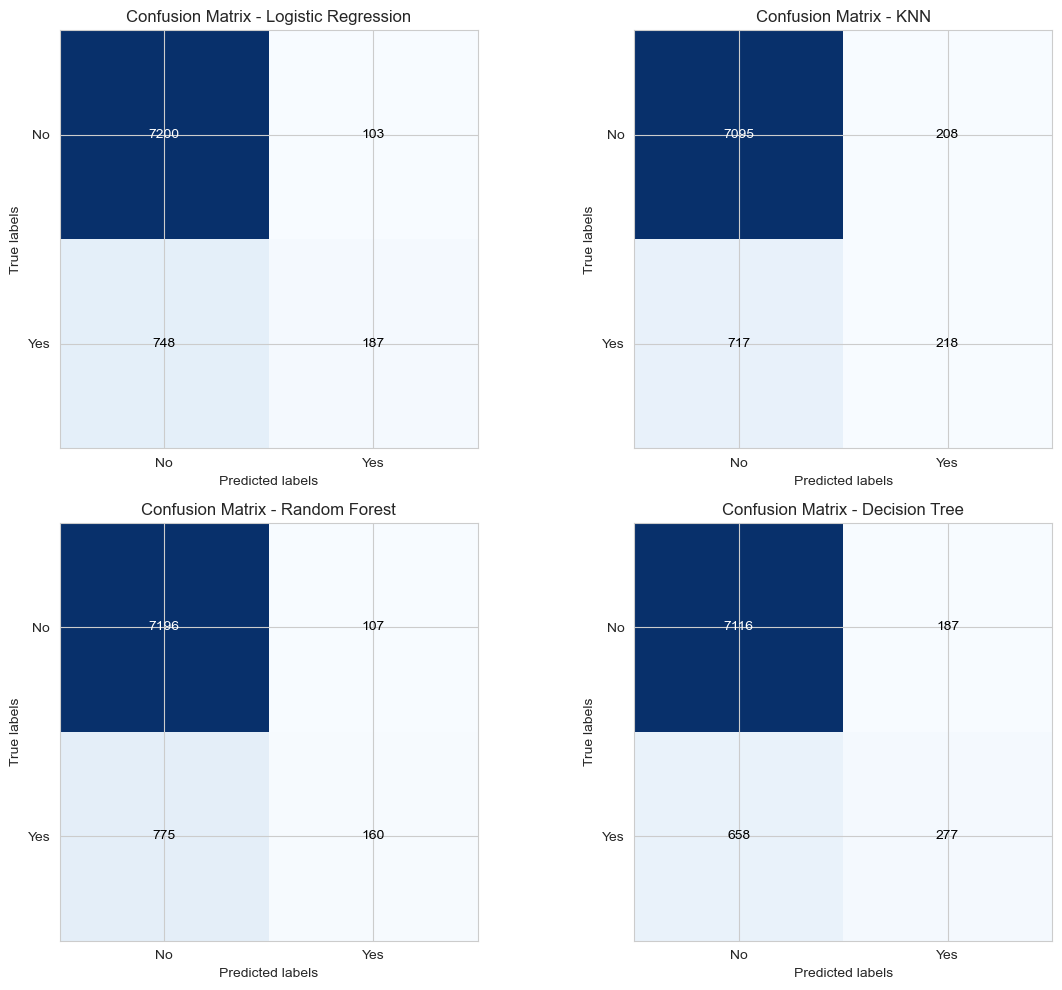

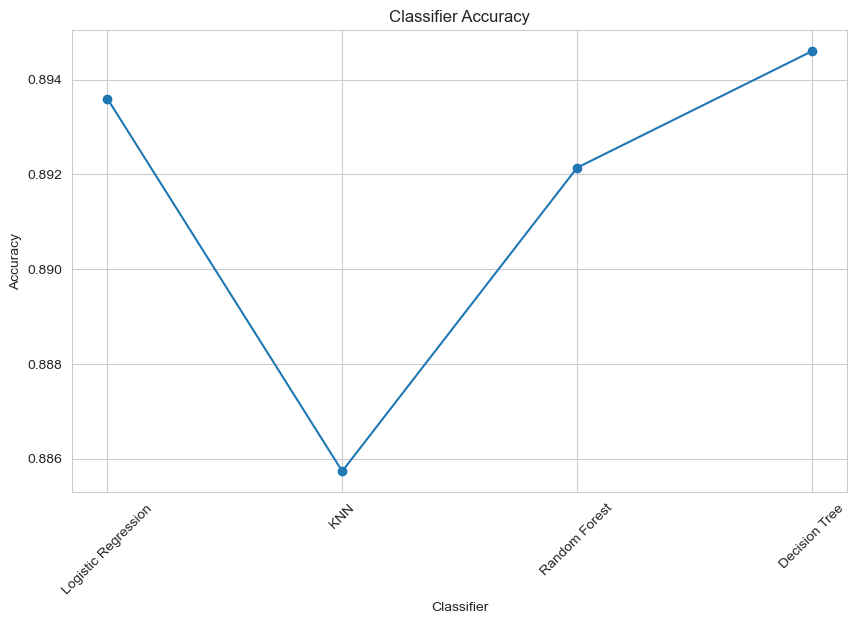

In [29]:

logistic_regression_params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'classifier__penalty': ['l1', 'l2']
}

knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 9],  
    'classifier__weights': ['uniform', 'distance'],  
    'classifier__p': [1, 2] 
}

random_forest_params = {
    'classifier__n_estimators': [50, 100, 200], 
    'classifier__max_depth': [None, 5, 10, 20], 
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

decision_tree_params = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 20], 
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4] 
}

logistic_regression_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

random_forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

decision_tree_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

classifiers = {
    'Logistic Regression': (logistic_regression_pipe, logistic_regression_params),
    'KNN': (knn_pipe, knn_params),
    'Random Forest': (random_forest_pipe, random_forest_params),
    'Decision Tree': (decision_tree_pipe, decision_tree_params)
}

results = {'Classifier': [], 'Accuracy': []}
conf_matrices = {}
roc_curves = {}

for name, (pipe, params) in classifiers.items():
    grid_search = GridSearchCV(pipe, params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    results['Classifier'].append(name)
    results['Accuracy'].append(grid_search.best_score_)
    
    y_pred = grid_search.predict(X_test)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    
    y_pred_prob = grid_search.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc(fpr, tpr)}

results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 6))
for name, curve in roc_curves.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f"{name} (AUC = {curve['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, (name, matrix) in enumerate(conf_matrices.items()):
    ax = axes[i//2, i%2]
    ax.imshow(matrix, cmap='Blues', interpolation='nearest')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.xaxis.set_ticklabels(['No', 'Yes'])
    ax.yaxis.set_ticklabels(['No', 'Yes'])
    for j in range(matrix.shape[0]):
        for k in range(matrix.shape[1]):
            ax.text(k, j, format(matrix[j, k], 'd'), ha="center", va="center", color="white" if matrix[j, k] > matrix.max()/2 else "black")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results_df['Classifier'], results_df['Accuracy'], marker='o')
plt.title('Classifier Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### Questions